In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load Dataset

In [2]:
# Load Dataset
df = pd.read_csv('data-ori.csv')

# Display basic information about dataset

In [3]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   4412 non-null   float64
 1   HAEMOGLOBINS  4412 non-null   float64
 2   ERYTHROCYTE   4412 non-null   float64
 3   LEUCOCYTE     4412 non-null   float64
 4   THROMBOCYTE   4412 non-null   int64  
 5   MCH           4412 non-null   float64
 6   MCHC          4412 non-null   float64
 7   MCV           4412 non-null   float64
 8   AGE           4412 non-null   int64  
 9   SEX           4412 non-null   object 
 10  SOURCE        4412 non-null   object 
dtypes: float64(7), int64(2), object(2)
memory usage: 379.3+ KB
None


In [4]:
print("\nSample Data:")
print(df.head())


Sample Data:
   HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         35.1          11.8         4.65        6.3          310  25.4  33.6   
1         43.5          14.8         5.39       12.7          334  27.5  34.0   
2         33.5          11.3         4.74       13.2          305  23.8  33.7   
3         39.1          13.7         4.98       10.5          366  27.5  35.0   
4         30.9           9.9         4.23       22.1          333  23.4  32.0   

    MCV  AGE SEX SOURCE  
0  75.5    1   F    out  
1  80.7    1   F    out  
2  70.7    1   F    out  
3  78.5    1   F    out  
4  73.0    1   M    out  


In [5]:
print("More about statistics:\n")
print(df.describe())

More about statistics:

       HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE    LEUCOCYTE  THROMBOCYTE  \
count  4412.000000   4412.000000  4412.000000  4412.000000  4412.000000   
mean     38.197688     12.741727     4.541260     8.718608   257.524479   
std       5.974784      2.079903     0.784091     5.049041   113.972365   
min      13.700000      3.800000     1.480000     1.100000     8.000000   
25%      34.375000     11.400000     4.040000     5.675000   188.000000   
50%      38.600000     12.900000     4.570000     7.600000   256.000000   
75%      42.500000     14.200000     5.050000    10.300000   321.000000   
max      69.000000     18.900000     7.860000    76.600000  1183.000000   

               MCH         MCHC          MCV          AGE  
count  4412.000000  4412.000000  4412.000000  4412.000000  
mean     28.234701    33.343042    84.612942    46.626473  
std       2.672639     1.228664     6.859101    21.731218  
min      14.900000    26.000000    54.000000     1.000000  


In [6]:
print("Check for missing values:")
print(df.isnull().sum())

Check for missing values:
HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64


# Encode categorical variables

In [7]:
label_encoder = LabelEncoder()
df['SEX'] = label_encoder.fit_transform(df['SEX'])  # Encode SEX (F/M) to 0/1

In [8]:
df['SOURCE'] = label_encoder.fit_transform(df['SOURCE'])  # Encode target variable ('in', 'out')

In [9]:
df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,0,1
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,0,1
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,0,1
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,0,1
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,1,1


# Separate features and target

In [10]:
X = df.drop(columns=['SOURCE'])  # Features
y = df['SOURCE']  # Target

C:\Users\jeeva\AppData\Local\Temp\ipykernel_5728\2733806215.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='Set1')


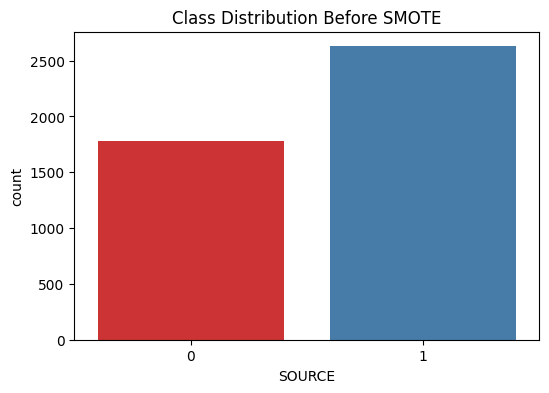

In [11]:
# Visualize Class Distribution Before SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette='Set1')
plt.title("Class Distribution Before SMOTE")
plt.show()

# Standardization

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction

In [13]:
pca = PCA(n_components=5)  # Keeping 5 principal components
X_pca = pca.fit_transform(X_scaled)

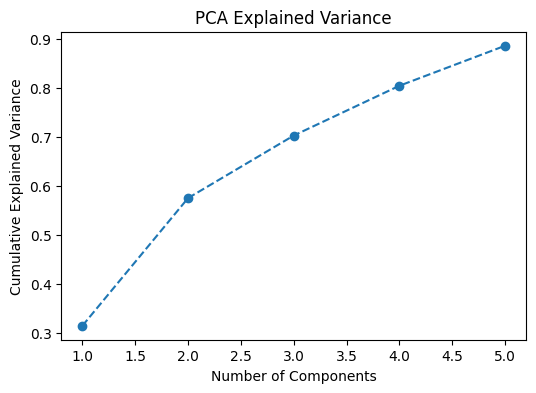

In [14]:
# PCA Variance Explained
plt.figure(figsize=(6,4))
plt.plot(range(1, 6), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title("PCA Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()


# Handle Class Imbalance using SMOTE

In [15]:
df['SOURCE'].value_counts()

SOURCE
1    2628
0    1784
Name: count, dtype: int64

In [16]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_pca, y)

C:\Users\jeeva\AppData\Local\Temp\ipykernel_5728\2754279323.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='viridis')


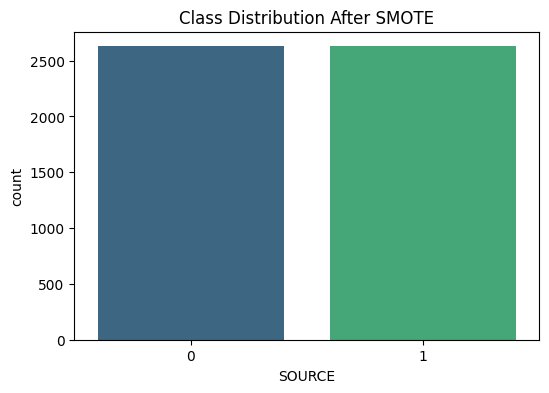

In [17]:
# Visualize Class Distribution After SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y_resampled, palette='viridis')
plt.title("Class Distribution After SMOTE")
plt.show()


# Split data into train and test sets

In [18]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Initialize models

In [19]:
models = {
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

# Hyperparameter tuning using Grid Search & Random Search

In [20]:
param_grid = {
    'XGBoost': {'n_estimators': [100, 200], 'max_depth': [3, 6]},
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [None, 10]},
    'Gradient Boosting': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]},
    'AdaBoost': {'n_estimators': [50, 100]},
    'CatBoost': {'depth': [4, 6], 'iterations': [100, 200]}
}

In [21]:
best_models = {}
accuracy_scores = {}

In [22]:

for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=skf, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    y_pred = best_models[name].predict(X_test)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    print(f"Best Parameters for {name}: {grid_search.best_params_}")

Best Parameters for XGBoost: {'max_depth': 6, 'n_estimators': 100}
Best Parameters for Random Forest: {'max_depth': None, 'n_estimators': 200}
Best Parameters for Gradient Boosting: {'learning_rate': 0.05, 'n_estimators': 200}
Best Parameters for AdaBoost: {'n_estimators': 100}
Best Parameters for CatBoost: {'depth': 6, 'iterations': 200}


# Evaluate models

In [23]:
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Model Evaluation:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))


XGBoost Model Evaluation:
Accuracy: 0.7291
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       526
           1       0.73      0.73      0.73       526

    accuracy                           0.73      1052
   macro avg       0.73      0.73      0.73      1052
weighted avg       0.73      0.73      0.73      1052


Random Forest Model Evaluation:
Accuracy: 0.7652
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       526
           1       0.77      0.76      0.76       526

    accuracy                           0.77      1052
   macro avg       0.77      0.77      0.77      1052
weighted avg       0.77      0.77      0.77      1052


Gradient Boosting Model Evaluation:
Accuracy: 0.7243
              precision    recall  f1-score   support

           0       0.73      0.70      0.72       526
           1       0.72      0.75      0.73       526

    accuracy                      

# Selecting the best model

In [24]:
best_model = max(best_models, key=lambda x: accuracy_score(y_test, best_models[x].predict(X_test)))
print(f"\nBest Performing Model: {best_model}")


Best Performing Model: Random Forest


C:\Users\jeeva\AppData\Local\Temp\ipykernel_5728\2654436876.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='viridis')


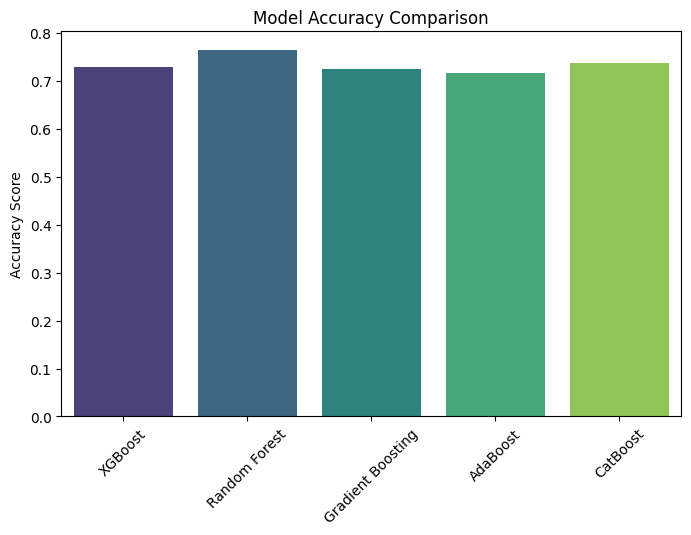

In [25]:
# Model Performance Visualization
plt.figure(figsize=(8,5))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='viridis')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.xticks(rotation=45)
plt.show()